<a href="https://colab.research.google.com/github/hungqbui/AudioClassification/blob/main/Audio_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
!kaggle datasets download -d chrisfilo/urbansound8k

Dataset URL: https://www.kaggle.com/datasets/chrisfilo/urbansound8k
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
100% 5.59G/5.61G [01:07<00:00, 177MB/s]
100% 5.61G/5.61G [01:07<00:00, 88.7MB/s]


In [3]:
!unzip urbansound8k.zip -d data


Streaming output truncated to the last 5000 lines.
  inflating: data/fold4/151877-5-1-0.wav  
  inflating: data/fold4/154758-5-0-0.wav  
  inflating: data/fold4/154758-5-0-1.wav  
  inflating: data/fold4/154758-5-0-10.wav  
  inflating: data/fold4/154758-5-0-11.wav  
  inflating: data/fold4/154758-5-0-12.wav  
  inflating: data/fold4/154758-5-0-13.wav  
  inflating: data/fold4/154758-5-0-14.wav  
  inflating: data/fold4/154758-5-0-15.wav  
  inflating: data/fold4/154758-5-0-16.wav  
  inflating: data/fold4/154758-5-0-17.wav  
  inflating: data/fold4/154758-5-0-18.wav  
  inflating: data/fold4/154758-5-0-19.wav  
  inflating: data/fold4/154758-5-0-2.wav  
  inflating: data/fold4/154758-5-0-20.wav  
  inflating: data/fold4/154758-5-0-21.wav  
  inflating: data/fold4/154758-5-0-3.wav  
  inflating: data/fold4/154758-5-0-4.wav  
  inflating: data/fold4/154758-5-0-5.wav  
  inflating: data/fold4/154758-5-0-6.wav  
  inflating: data/fold4/154758-5-0-7.wav  
  inflating: data/fold4/154758-5-0

In [4]:
import IPython.display as ipd
audio_file_path = 'data/fold9/149255-9-0-5.wav'
ipd.Audio(audio_file_path)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [6]:
dataset = pd.read_csv("data/UrbanSound8K.csv")
dataset['class'] = np.where(dataset['class'] != 'dog_bark','0','1')
dataset.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,1
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,0
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,0
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,0
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,0


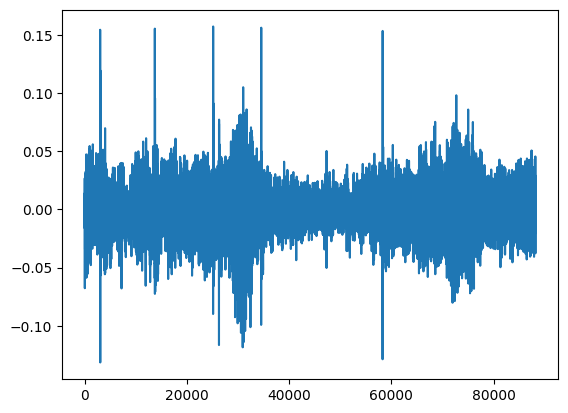

4.0


In [7]:
import librosa

librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)
plt.plot(librosa_audio_data)
plt.show()
print(len(librosa_audio_data) / librosa_sample_rate)

In [8]:
def extract_mfcc(audio_file_path):
  audio_data, sr = librosa.load(audio_file_path)
  mfccs = librosa.feature.mfcc(y=audio_data, sr=sr, n_mfcc=13)

  return np.mean(mfccs, axis=1)


In [9]:
base_path = 'data/'

mfcc_col = [extract_mfcc(f'{base_path}fold{row["fold"]}/{row["slice_file_name"]}') for index, row in dataset.iterrows()]


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(


In [10]:
processed = pd.DataFrame({ "is_dog_bark": dataset["class"] })

mfcc_colNP = np.array(mfcc_col)

labels = []
for i in range(1,14):
  labels.append(f"coef{i}")

for index in range(len(labels)):
  processed[labels[index]] = mfcc_colNP.T[index]

processed

,is_dog_bark,coef1,coef2,coef3,coef4,coef5,coef6,coef7,coef8,coef9,coef10,coef11,coef12,coef13
0,1,-211.936981,62.581211,-122.813156,-60.745293,-13.893755,-29.789837,-3.978872,11.682741,12.963834,8.336421,-6.529816,-2.996103,-12.887945
1,0,-417.005188,99.336624,-42.995583,51.073326,9.853777,7.969693,11.197088,1.929117,7.030397,4.270228,-3.584725,13.890946,-2.764493
2,0,-452.393158,112.362534,-37.578072,43.195866,8.631845,15.379368,16.882149,1.233047,6.833122,3.900116,-5.168850,8.300045,1.904137
3,0,-406.479218,91.196602,-25.043552,42.784519,11.586844,5.054164,12.431632,-1.599949,6.656064,1.442355,-4.624870,14.211005,0.434271
4,0,-439.638733,103.862228,-42.658783,50.690285,12.209423,15.873465,11.729268,1.533585,11.292241,2.548622,-7.290973,10.374461,2.101836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,0,-391.372101,125.362389,-40.634056,25.899754,1.730348,5.575200,16.873087,7.889438,3.488612,-4.572375,2.728576,0.208586,-4.852818
8728,0,-339.427155,76.409096,-35.309879,41.984035,-22.963873,-13.623511,27.856026,-9.215820,-5.666291,13.024158,-9.010245,-1.397294,-0.384217
8729,0,-297.315338,102.090256,-36.751080,26.816488,-0.249389,3.960868,11.113068,1.912290,0.677116,-1.804644,-1.635858,-4.759850,-9.209758
8730,0,-336.923859,115.313904,-44.847092,24.968985,-9.888027,-2.154685,22.700090,0.234236,-0.122908,10.174067,-2.782739,-6.995721,-0.481200


In [11]:
processed.groupby("is_dog_bark").count()

,coef1,coef2,coef3,coef4,coef5,coef6,coef7,coef8,coef9,coef10,coef11,coef12,coef13
is_dog_bark,,,,,,,,,,,,,
0,7732,7732,7732,7732,7732,7732,7732,7732,7732,7732,7732,7732,7732
1,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000


In [12]:
X = processed[processed.columns[1:]]
y = processed["is_dog_bark"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

X_train_resampled, y_train_resampled = ros.fit_resample(X_train,y_train)


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# lr = LogisticRegression()
rf = RandomForestClassifier()
# gbc = GradientBoostingClassifier()
# mlp = MLPClassifier()

# lr.fit(X_train_resampled, y_train_resampled)
rf.fit(X_train_resampled, y_train_resampled)
# gbc.fit(X_train_resampled, y_train_resampled)
# mlp.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [15]:
y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9477782867613376
